<a href="https://colab.research.google.com/github/nataliaMS21/MetodosComputacionales810/blob/main/Numeros_Errores/Actividad03_Convergencia_Truncamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

Exact value of √(1+0.5) = √1.5 = 1.224744871391589

Term 1:
Approximation: 1.000000000000000
Absolute error: 0.224744871391589
Relative error percentage: 18.3503419072%

Term 2:
Approximation: 1.250000000000000
Absolute error: 0.025255128608411
Relative error percentage: 2.0620726160%

Term 3:
Approximation: 1.218750000000000
Absolute error: 0.005994871391589
Relative error percentage: 0.4894791994%

Term 4:
Approximation: 1.226562500000000
Absolute error: 0.001817628608411
Relative error percentage: 0.1484087544%

Term 5:
Approximation: 1.224121093750000
Absolute error: 0.000623777641589
Relative error percentage: 0.0509312312%

Term 6:
Approximation: 1.224975585937500
Absolute error: 0.000230714545911
Relative error percentage: 0.0188377638%

Term 7:
Approximation: 1.224655151367188
Absolute error: 0.000089720024401
Relative error percentage: 0.0073256093%

Term 8:
Approximation: 1.224781036376953
Absolute error: 0.000036164985364
Relative error percentage: 0.0029528587%

Term 9:
App

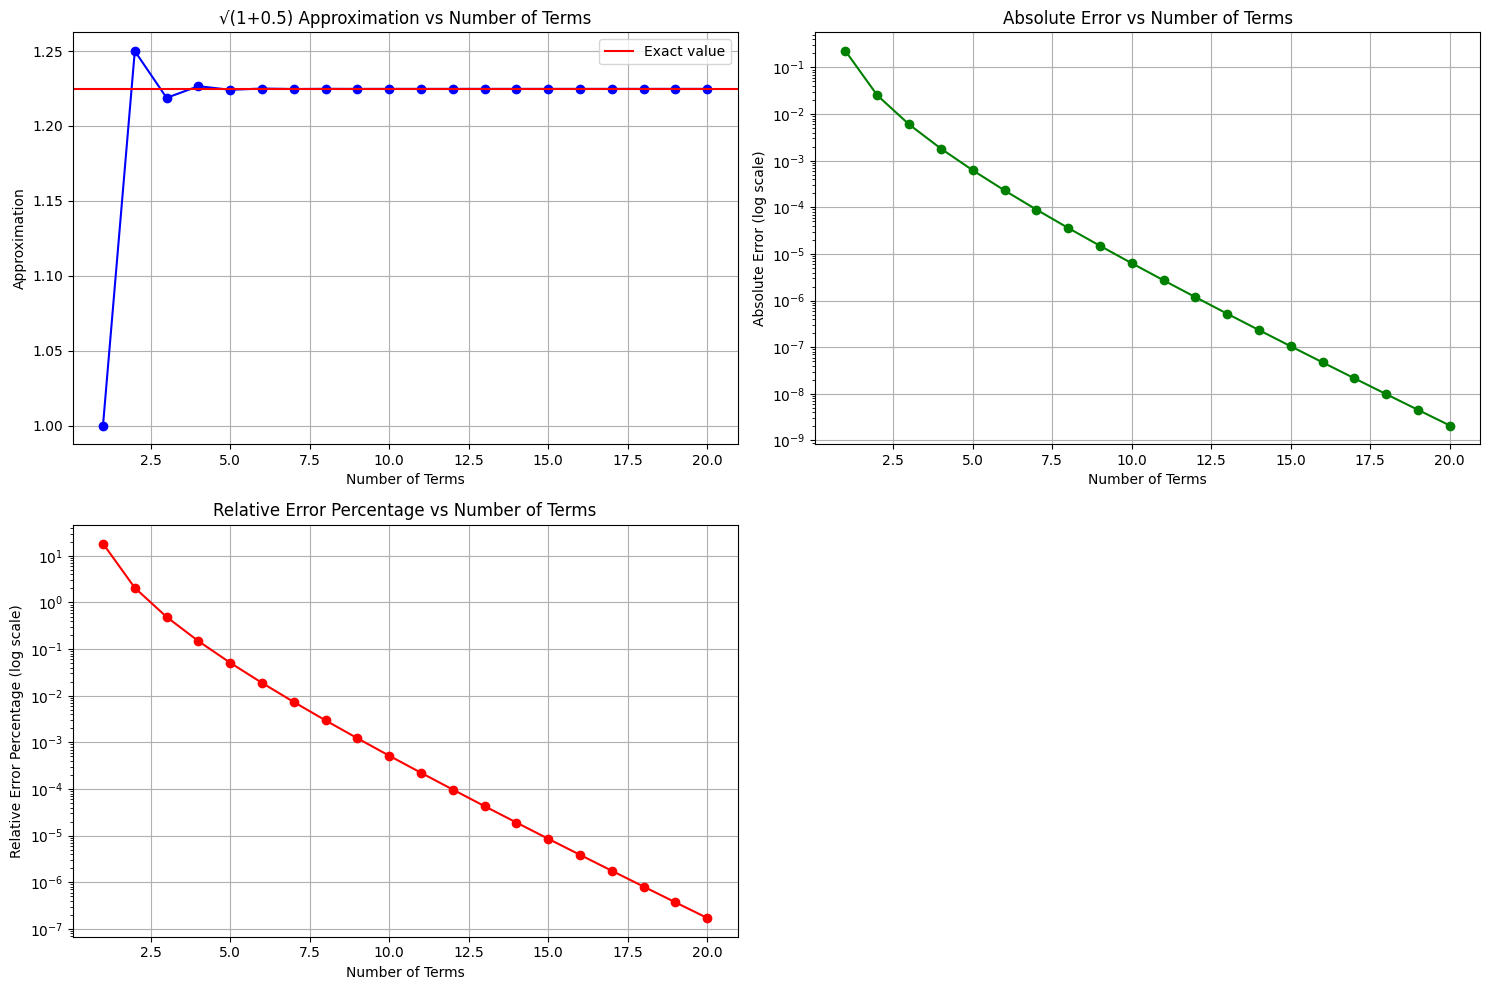


Tolerance: 1.0e-01
Terms needed: 2
Approximation: 1.250000000000000
Absolute error: 0.025255128608411
Relative error percentage: 2.0620726160%

Tolerance: 1.0e-02
Terms needed: 3
Approximation: 1.218750000000000
Absolute error: 0.005994871391589
Relative error percentage: 0.4894791994%

Tolerance: 1.0e-03
Terms needed: 5
Approximation: 1.224121093750000
Absolute error: 0.000623777641589
Relative error percentage: 0.0509312312%

Tolerance: 1.0e-04
Terms needed: 7
Approximation: 1.224655151367188
Absolute error: 0.000089720024401
Relative error percentage: 0.0073256093%

Tolerance: 1.0e-05
Terms needed: 10
Approximation: 1.224751204252243
Absolute error: 0.000006332860654
Relative error percentage: 0.0005170759%

Tolerance: 1.0e-06
Terms needed: 13
Approximation: 1.224744347797241
Absolute error: 0.000000523594348
Relative error percentage: 0.0000427513%

Tolerance: 1.0e-08
Terms needed: 18
Approximation: 1.224744881250897
Absolute error: 0.000000009859308
Relative error percentage: 0.0

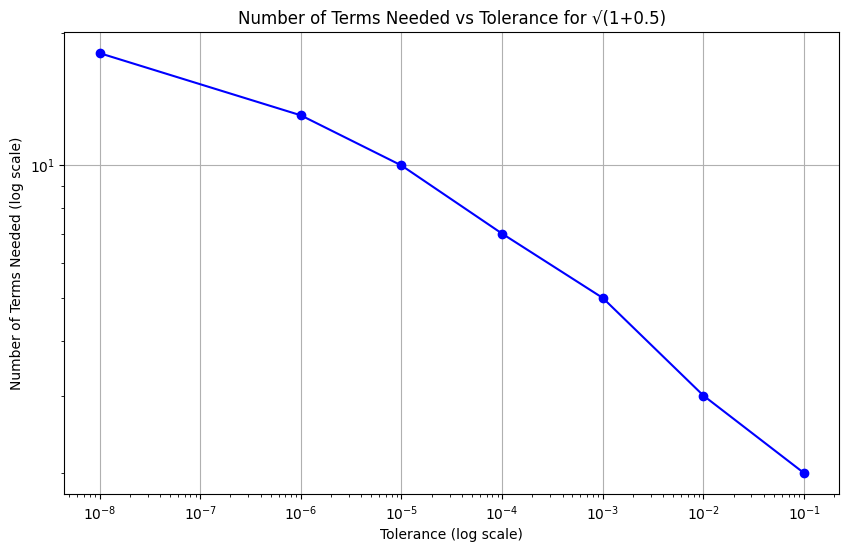

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_coef(alpha, n):
    if n == 0:
        return 1

    coef = 1
    for i in range(1, n + 1):
        coef *= (alpha - (i - 1)) / i
    return coef

def sqrt_taylor(x, max_terms=50):
    if x <= -1:
        raise ValueError("x must be greater than -1 for √(1+x) to be real")

    # Calculating exact value
    exact_value = np.sqrt(1 + x)
    results = []
    abs_errors = []
    rel_errors = []

    # Calculate the series
    partial_sum = 0
    for n in range(max_terms):
        term = binomial_coef(0.5, n) * (x ** n)
        partial_sum += term

        results.append(partial_sum)
        abs_error = abs(exact_value - partial_sum)
        rel_error = abs_error / exact_value * 100  # Percentage

        abs_errors.append(abs_error)
        rel_errors.append(rel_error)

    return {
        'approximations': results,
        'absolute_errors': abs_errors,
        'relative_errors': rel_errors,
        'exact_value': exact_value
    }

def sqrt_taylor_tolerance(x, tolerances):
    """Calculate √(1+x) using Taylor series for different tolerance values."""
    if x <= -1:
        raise ValueError("x must be greater than -1 for √(1+x) to be real")

    exact_value = np.sqrt(1 + x)
    results = []

    for tol in tolerances:
        n = 0
        partial_sum = 0
        abs_error = float('inf')

        while abs_error > tol and n < 100:  # Limit to 100 terms max
            term = binomial_coef(0.5, n) * (x ** n)
            partial_sum += term
            abs_error = abs(exact_value - partial_sum)
            n += 1

        rel_error = abs_error / exact_value * 100  # Percentage

        results.append({
            'tolerance': tol,
            'terms_needed': n,
            'approximation': partial_sum,
            'absolute_error': abs_error,
            'relative_error': rel_error
        })

    return results

# Parameter for evaluation
x_value = 0.5
exact_value = np.sqrt(1 + x_value)
print(f"Exact value of √(1+0.5) = √1.5 = {exact_value:.15f}")

# a) and b) Calculate approximation with different number of terms
max_terms = 20
result = sqrt_taylor(x_value, max_terms=max_terms)

# Print results for each iteration
for n in range(max_terms):
    print(f"\nTerm {n+1}:")
    print(f"Approximation: {result['approximations'][n]:.15f}")
    print(f"Absolute error: {result['absolute_errors'][n]:.15f}")
    print(f"Relative error percentage: {result['relative_errors'][n]:.10f}%")

# c) Plot the convergence
plt.figure(figsize=(15, 10))

# Plot approximations vs iterations
plt.subplot(2, 2, 1)
plt.plot(range(1, max_terms + 1), result['approximations'], 'bo-')
plt.axhline(y=exact_value, color='r', linestyle='-', label='Exact value')
plt.xlabel('Number of Terms')
plt.ylabel('Approximation')
plt.title('√(1+0.5) Approximation vs Number of Terms')
plt.legend()
plt.grid(True)

# Plot absolute error vs iterations
plt.subplot(2, 2, 2)
plt.semilogy(range(1, max_terms + 1), result['absolute_errors'], 'go-')
plt.xlabel('Number of Terms')
plt.ylabel('Absolute Error (log scale)')
plt.title('Absolute Error vs Number of Terms')
plt.grid(True)

# Plot relative error percentage vs iterations
plt.subplot(2, 2, 3)
plt.semilogy(range(1, max_terms + 1), result['relative_errors'], 'ro-')
plt.xlabel('Number of Terms')
plt.ylabel('Relative Error Percentage (log scale)')
plt.title('Relative Error Percentage vs Number of Terms')
plt.grid(True)

plt.tight_layout()
plt.savefig('sqrt_taylor_convergence.png')
plt.show()

# d) Calculate with different tolerance values
tolerances = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-8]
tolerance_results = sqrt_taylor_tolerance(x_value, tolerances)

# Print results for each tolerance
for result in tolerance_results:
    print(f"\nTolerance: {result['tolerance']:.1e}")
    print(f"Terms needed: {result['terms_needed']}")
    print(f"Approximation: {result['approximation']:.15f}")
    print(f"Absolute error: {result['absolute_error']:.15f}")
    print(f"Relative error percentage: {result['relative_error']:.10f}%")

# Plot terms needed vs tolerance
plt.figure(figsize=(10, 6))
plt.loglog([r['tolerance'] for r in tolerance_results],
           [r['terms_needed'] for r in tolerance_results], 'bo-')
plt.xlabel('Tolerance (log scale)')
plt.ylabel('Number of Terms Needed (log scale)')
plt.title('Number of Terms Needed vs Tolerance for √(1+0.5)')
plt.grid(True)
plt.savefig('sqrt_taylor_tolerance.png')
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



Exact value of √(1+0.5) = √1.5 = 1.224744871391589

Term 1:
Approximation: 1.000000000000000
Absolute error: 0.224744871391589
Relative error percentage: 18.3503419072%

Term 2:
Approximation: 1.250000000000000
Absolute error: 0.025255128608411
Relative error percentage: 2.0620726160%

Term 3:
Approximation: 1.218750000000000
Absolute error: 0.005994871391589
Relative error percentage: 0.4894791994%

Term 4:
Approximation: 1.226562500000000
Absolute error: 0.001817628608411
Relative error percentage: 0.1484087544%

Term 5:
Approximation: 1.224121093750000
Absolute error: 0.000623777641589
Relative error percentage: 0.0509312312%

Term 6:
Approximation: 1.224975585937500
Absolute error: 0.000230714545911
Relative error percentage: 0.0188377638%

Term 7:
Approximation: 1.224655151367188
Absolute error: 0.000089720024401
Relative error percentage: 0.0073256093%

Term 8:
Approximation: 1.224781036376953
Absolute error: 0.000036164985364
Relative error percentage: 0.0029528587%

Term 9:
App

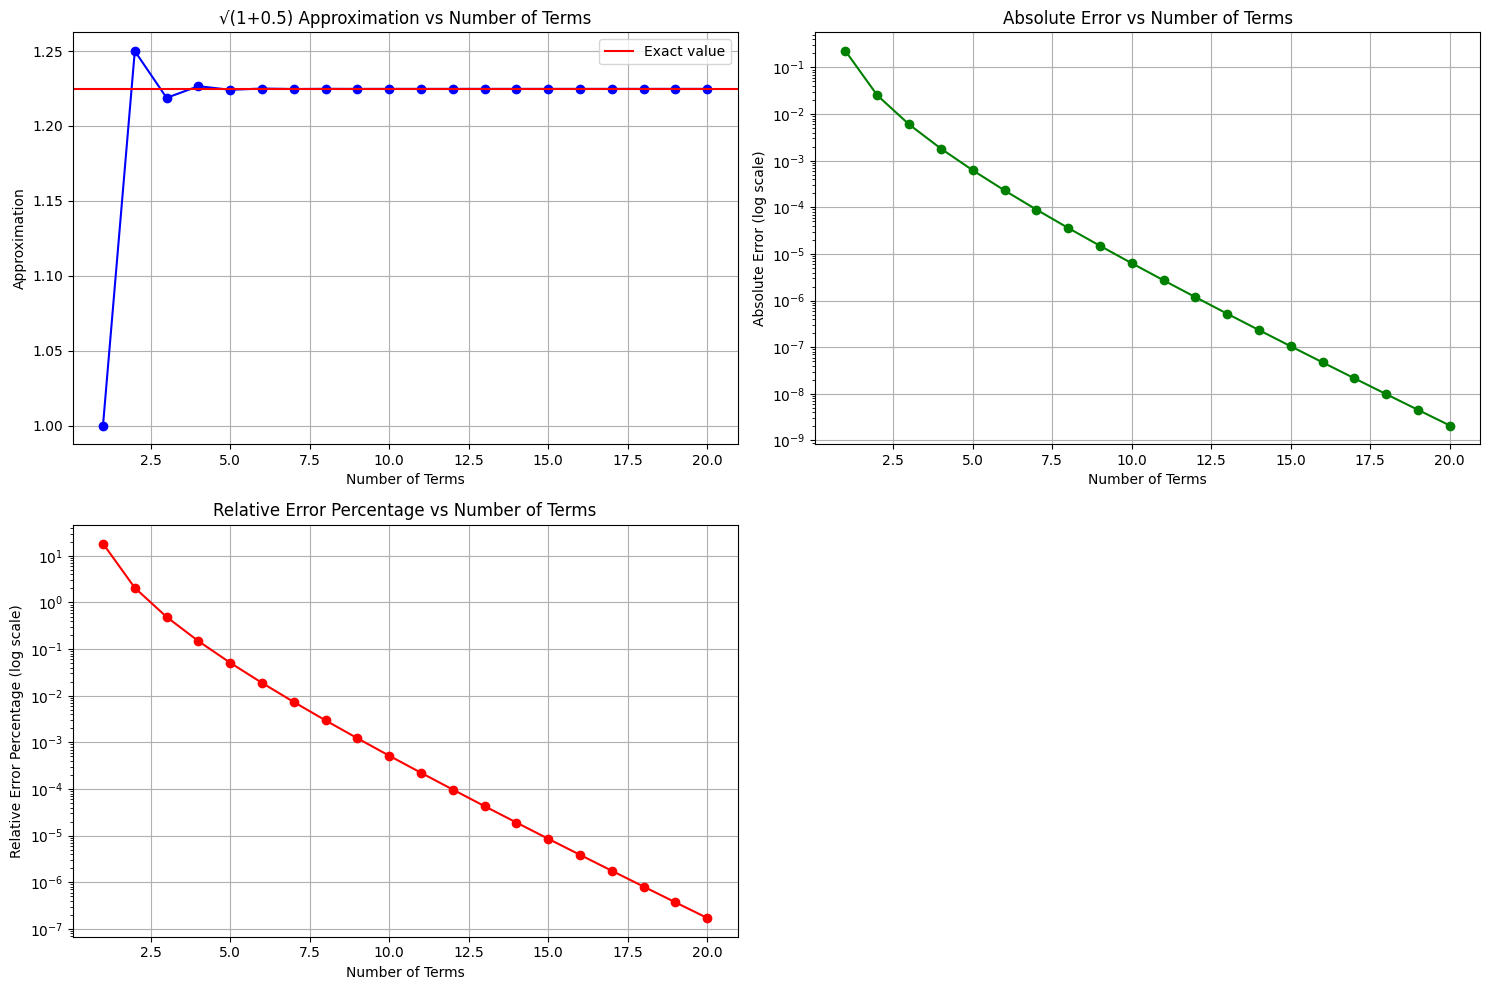


Tolerance: 1.0e-01
Terms needed: 2
Approximation: 1.250000000000000
Absolute error: 0.025255128608411
Relative error percentage: 2.0620726160%

Tolerance: 1.0e-02
Terms needed: 3
Approximation: 1.218750000000000
Absolute error: 0.005994871391589
Relative error percentage: 0.4894791994%

Tolerance: 1.0e-03
Terms needed: 5
Approximation: 1.224121093750000
Absolute error: 0.000623777641589
Relative error percentage: 0.0509312312%

Tolerance: 1.0e-04
Terms needed: 7
Approximation: 1.224655151367188
Absolute error: 0.000089720024401
Relative error percentage: 0.0073256093%

Tolerance: 1.0e-05
Terms needed: 10
Approximation: 1.224751204252243
Absolute error: 0.000006332860654
Relative error percentage: 0.0005170759%

Tolerance: 1.0e-06
Terms needed: 13
Approximation: 1.224744347797241
Absolute error: 0.000000523594348
Relative error percentage: 0.0000427513%

Tolerance: 1.0e-08
Terms needed: 18
Approximation: 1.224744881250897
Absolute error: 0.000000009859308
Relative error percentage: 0.0

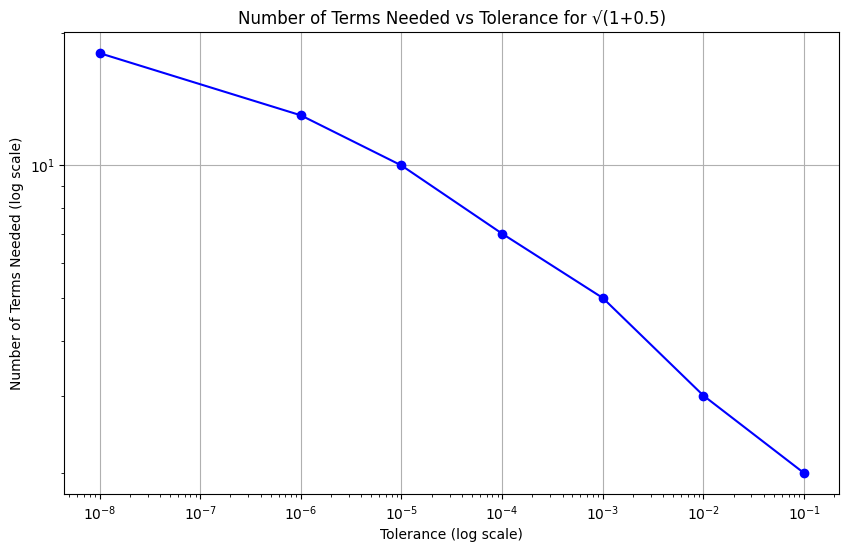

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_coef(alpha, n):
    """Calculate the binomial coefficient (alpha choose n)."""
    if n == 0:
        return 1

    coef = 1
    for i in range(1, n + 1):
        coef *= (alpha - (i - 1)) / i
    return coef

def sqrt_taylor(x, max_terms=50):
    """Calculate √(1+x) using Taylor series with given number of terms."""
    if x <= -1:
        raise ValueError("x must be greater than -1 for √(1+x) to be real")

    # Calculating exact value
    exact_value = np.sqrt(1 + x)

    results = []
    abs_errors = []
    rel_errors = []

    # Calculate the series
    partial_sum = 0
    for n in range(max_terms):
        term = binomial_coef(0.5, n) * (x ** n)
        partial_sum += term

        results.append(partial_sum)
        abs_error = abs(exact_value - partial_sum)
        rel_error = abs_error / exact_value * 100  # Percentage

        abs_errors.append(abs_error)
        rel_errors.append(rel_error)

    return {
        'approximations': results,
        'absolute_errors': abs_errors,
        'relative_errors': rel_errors,
        'exact_value': exact_value
    }

def sqrt_taylor_tolerance(x, tolerances):
    """Calculate √(1+x) using Taylor series for different tolerance values."""
    if x <= -1:
        raise ValueError("x must be greater than -1 for √(1+x) to be real")

    exact_value = np.sqrt(1 + x)
    results = []

    for tol in tolerances:
        n = 0
        partial_sum = 0
        abs_error = float('inf')

        while abs_error > tol and n < 100:  # Limit to 100 terms max
            term = binomial_coef(0.5, n) * (x ** n)
            partial_sum += term
            abs_error = abs(exact_value - partial_sum)
            n += 1

        rel_error = abs_error / exact_value * 100  # Percentage

        results.append({
            'tolerance': tol,
            'terms_needed': n,
            'approximation': partial_sum,
            'absolute_error': abs_error,
            'relative_error': rel_error
        })

    return results

# Parameter for evaluation
x_value = 0.5
exact_value = np.sqrt(1 + x_value)
print(f"Exact value of √(1+0.5) = √1.5 = {exact_value:.15f}")

# a) and b) Calculate approximation with different number of terms
max_terms = 20
result = sqrt_taylor(x_value, max_terms=max_terms)

# Print results for each iteration
for n in range(max_terms):
    print(f"\nTerm {n+1}:")
    print(f"Approximation: {result['approximations'][n]:.15f}")
    print(f"Absolute error: {result['absolute_errors'][n]:.15f}")
    print(f"Relative error percentage: {result['relative_errors'][n]:.10f}%")

# c) Plot the convergence
plt.figure(figsize=(15, 10))

# Plot approximations vs iterations
plt.subplot(2, 2, 1)
plt.plot(range(1, max_terms + 1), result['approximations'], 'bo-')
plt.axhline(y=exact_value, color='r', linestyle='-', label='Exact value')
plt.xlabel('Number of Terms')
plt.ylabel('Approximation')
plt.title('√(1+0.5) Approximation vs Number of Terms')
plt.legend()
plt.grid(True)

# Plot absolute error vs iterations
plt.subplot(2, 2, 2)
plt.semilogy(range(1, max_terms + 1), result['absolute_errors'], 'go-')
plt.xlabel('Number of Terms')
plt.ylabel('Absolute Error (log scale)')
plt.title('Absolute Error vs Number of Terms')
plt.grid(True)

# Plot relative error percentage vs iterations
plt.subplot(2, 2, 3)
plt.semilogy(range(1, max_terms + 1), result['relative_errors'], 'ro-')
plt.xlabel('Number of Terms')
plt.ylabel('Relative Error Percentage (log scale)')
plt.title('Relative Error Percentage vs Number of Terms')
plt.grid(True)

plt.tight_layout()
plt.savefig('sqrt_taylor_convergence.png')
plt.show()

# d) Calculate with different tolerance values
tolerances = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-8]
tolerance_results = sqrt_taylor_tolerance(x_value, tolerances)

# Print results for each tolerance
for result in tolerance_results:
    print(f"\nTolerance: {result['tolerance']:.1e}")
    print(f"Terms needed: {result['terms_needed']}")
    print(f"Approximation: {result['approximation']:.15f}")
    print(f"Absolute error: {result['absolute_error']:.15f}")
    print(f"Relative error percentage: {result['relative_error']:.10f}%")

# Plot terms needed vs tolerance
plt.figure(figsize=(10, 6))
plt.loglog([r['tolerance'] for r in tolerance_results],
           [r['terms_needed'] for r in tolerance_results], 'bo-')
plt.xlabel('Tolerance (log scale)')
plt.ylabel('Number of Terms Needed (log scale)')
plt.title('Number of Terms Needed vs Tolerance for √(1+0.5)')
plt.grid(True)
plt.savefig('sqrt_taylor_tolerance.png')
plt.show()